### Problem Statement: R2_score of LinearRegression Model is low , can we increase the R2 score ?

In [1]:
## Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,RANSACRegressor,Lasso,ElasticNet
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,OneHotEncoder,PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#loading Data to DataFrame
df = pd.read_csv('Maison.csv')
df.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [3]:
# Renaming the columns
df = df.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [4]:
#check for col name changes
df.head(2)

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0


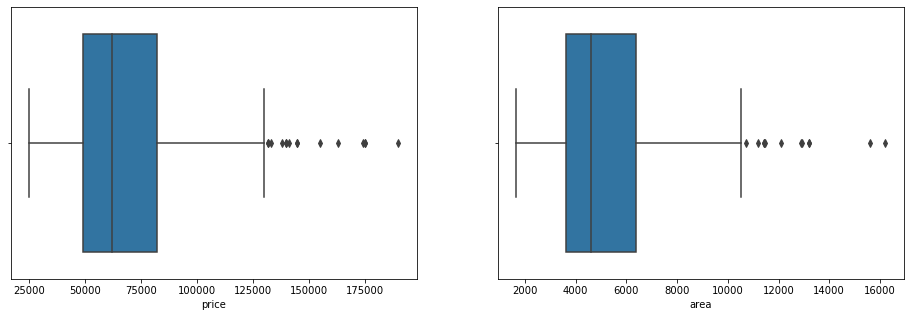

In [5]:
#Checking for outliers in price and area 
fig,ax = plt.subplots(ncols=2,figsize=(16,5))
for i in range(2):
    sns.boxplot(df[df.columns[i]],ax=ax[i])

###### Data does have outliers but removing them would do result in loss of understanding the data 

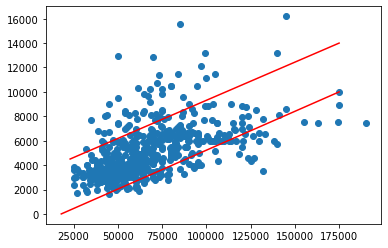

In [6]:
# visualising price and area scatter plot 
plt.scatter(df['price'],df['area'])
plt.plot([23000,175000],[4500,14000],c='r')
plt.plot([18000,175000],[0,10000],c='r')
#as discovered earlier data has outliers and seems random.however upon closer observation we can notice that there is 
# a sligh oval buble in between highlighed by red lines 

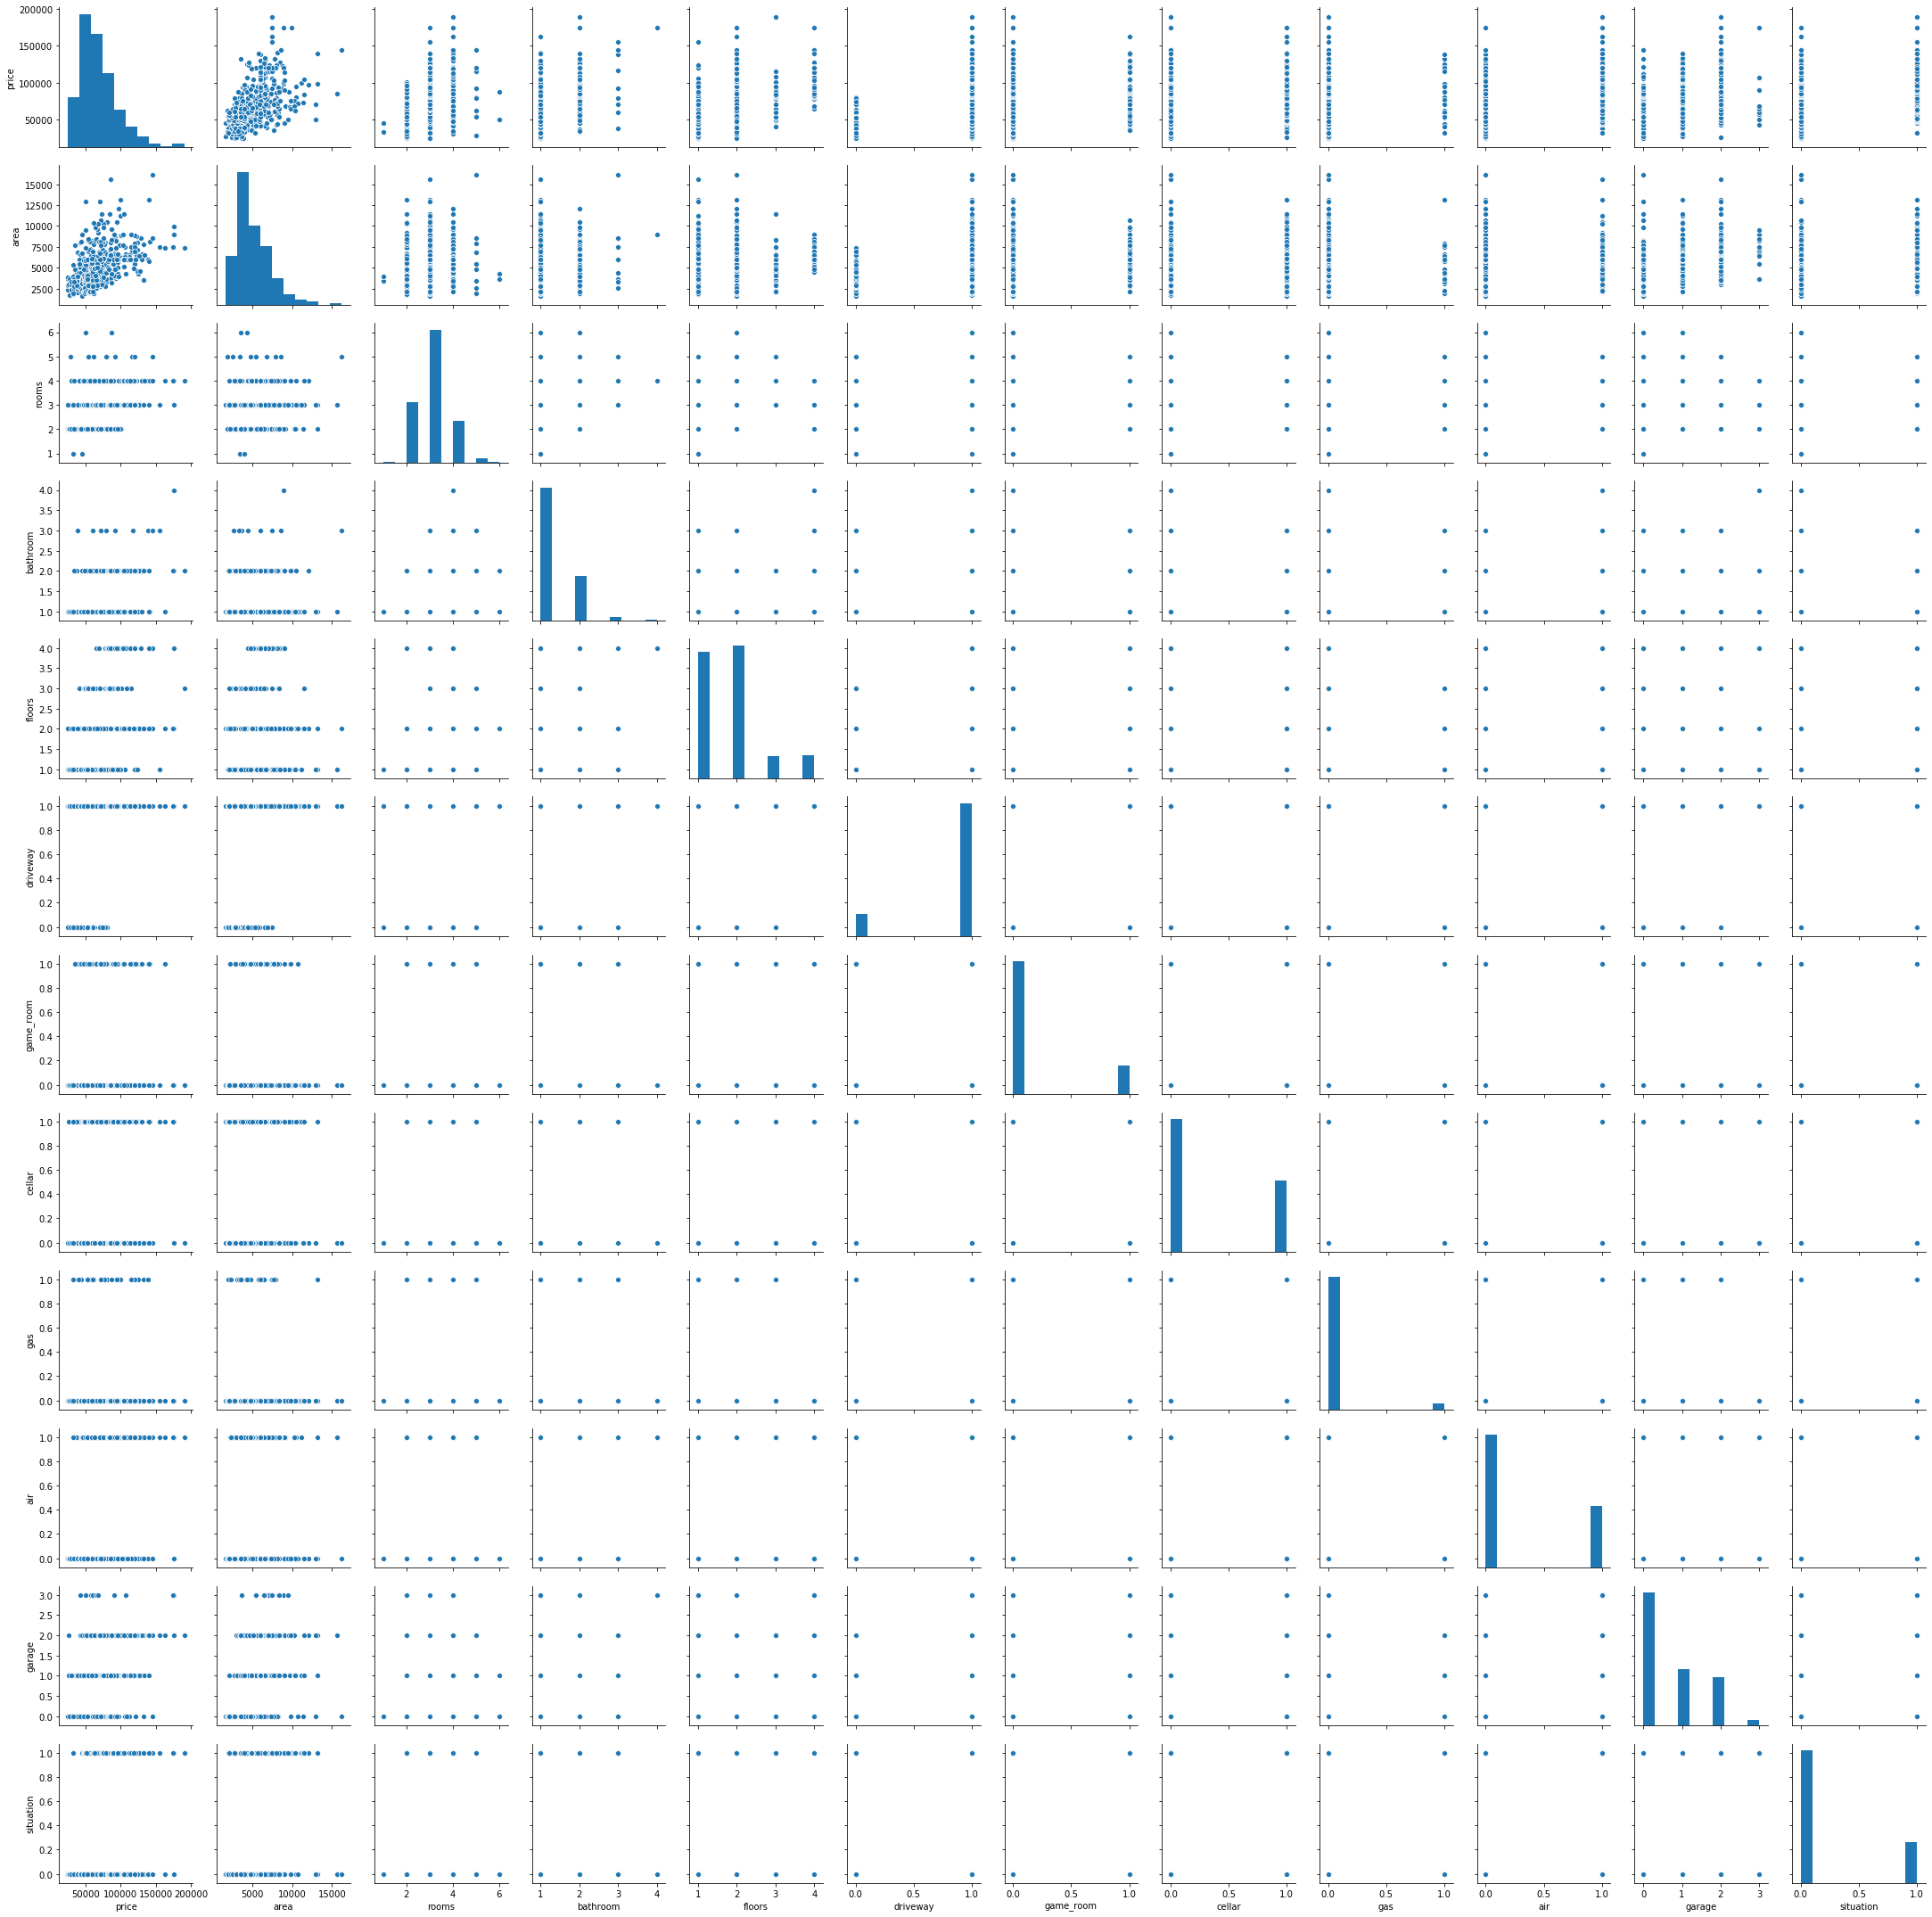

In [7]:
#visualising all cols with scatter plot
sns.pairplot(df)
#Very less correlated data...

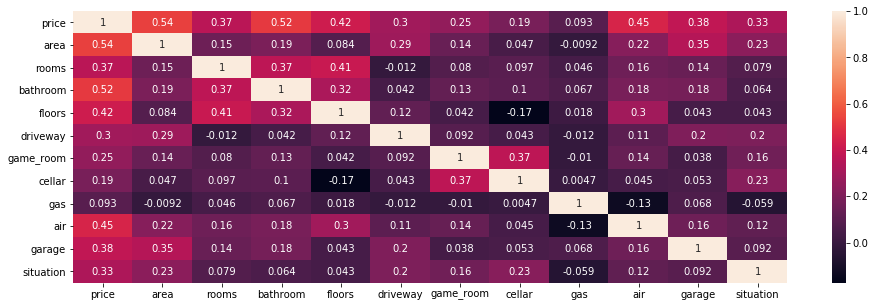

In [7]:
#verifying with heatmap
fig,ax = plt.subplots(figsize=(16,5))

sns.heatmap(df.corr(),annot=True,xticklabels=list(df.columns),yticklabels=list(df.columns))

###### The highest covariance score is 0.54 which essentailly means that there are not many correlated features 

In [8]:
#unique values in each columns: 
for i in list(df.columns):
    print("Feature :",i,":",len(df[i].unique()))

Feature : price : 219
Feature : area : 284
Feature : rooms : 6
Feature : bathroom : 4
Feature : floors : 4
Feature : driveway : 2
Feature : game_room : 2
Feature : cellar : 2
Feature : gas : 2
Feature : air : 2
Feature : garage : 4
Feature : situation : 2


In [143]:
#There seems to be lot of  repeated values in area & price col
area_dic = {}
for i in set(df['area']):
    area_dic[i] = list(df[df['area']==i].index)

In [9]:
#indexes of repeated areas:
ind =[359,360,384,394,404,406,408,409,482]

for i in ind:
    print(df.iloc[i,:])
    
# although the area is same price seems to vary for houses with rooms and bathrooms and floors 

price        107000
area           6600
rooms             3
bathroom          1
floors            4
driveway          1
game_room         0
cellar            0
gas               0
air               1
garage            3
situation         1
Name: 359, dtype: int64
price        130000
area           6600
rooms             4
bathroom          2
floors            2
driveway          1
game_room         1
cellar            1
gas               0
air               1
garage            1
situation         1
Name: 360, dtype: int64
price        78000
area          6600
rooms            4
bathroom         2
floors           2
driveway         1
game_room        1
cellar           1
gas              0
air              0
garage           0
situation        1
Name: 384, dtype: int64
price        72000
area          6600
rooms            3
bathroom         1
floors           1
driveway         1
game_room        1
cellar           1
gas              0
air              0
garage           0
situation  

###### Data preprocessing 

In [10]:
X = df.drop(columns=['price'])
y = np.array(df['price']).reshape(-1,1)

#### Bringing all features to same scale  to avoid bias, (side note scaling , normalising ,MinMaxScaler does not seem to have much effect on dat

In [11]:
#Applying scaler for the sake of it 
std = StandardScaler()

###### Splitting data for train, test

In [12]:
xTst,xTrn,yTst,yTrn = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=10)

###### Fitting data for scaler model

In [13]:
stdXtst = std.fit_transform(xTst)
stdXrn = std.transform(xTrn)

###### LinearRegression Model 

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(stdXrn,yTrn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
yPred = lm.predict(stdXtst)

In [17]:
r2_score(yTst,yPred)

0.6186024581018239

###### Oridnary least squared method does not give  high r2 which essentially signals that model is not under standing the data passed efficiently

###### Fitting Polynomial features the model

In [18]:
poly = PolynomialFeatures(degree=4)

In [19]:
polyModel = LinearRegression()

In [20]:
xTrain_poly = poly.fit_transform(stdXrn)
xTest_poly = poly.transform(stdXtst)


In [21]:
polyModel.fit(xTrain_poly,yTrn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
yPP = polyModel.predict(xTest_poly)

In [23]:
r2_score(yTst,yPP)

-1.8405632865723807e+20

###### Polynomial Result does not give promising results
    degree= 2: R2 score: -1.384 
    degree = 3: r2_score: -4.24
    degree = 4: r2_score: -1.84
            
        

###### RANSACRegressor : 

In [24]:
ranModel = RANSACRegressor(LinearRegression(),min_samples=40,max_trials=100,
                           loss='absolute_loss',residual_threshold=5.0,random_state=0)

In [25]:
ranModel.fit(X,y)

c:\python37\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=40, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [26]:
ranModel.score(X,y)

0.16084142723733696

In [27]:
y_trn_pred =ranModel.predict(xTrn)
y_tst_pred = ranModel.predict(xTst)

In [28]:
r2_score(yTst,y_tst_pred)

0.1609172687565259

###### RANSACMODEL Decrease the r2 Score

###### RandomForestRegressor

In [29]:
frst = RandomForestRegressor(n_estimators=1000,
                             criterion='mse',
                             random_state=1)
#stdXrn
#stdXtst

In [30]:
frst.fit(stdXrn,yTrn.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [31]:
y_trn_prd = frst.predict(stdXrn)
y_tst_prd = frst.predict(stdXtst)

In [32]:
r2_score(yTrn,y_trn_prd)

0.9424587895679061

# RandomForest Regressor gives higher r2 Score (0.94) then other model

###### The underlying assumption is that because of rooms and floors adding up to the price for same area, LinearRegression Model is not able to understand the data in terms of linearity and it becomes more or  less a regression problem with multiclass target ... hence choosing an tree based regressor seemed like a good choice